To use this notebook you need to save the data to your Google Drive and then to launch your google drive (it is needed only once). You need to keep the same structure that we have in the zip file from Coby. The first folder shoud be Study/. 

To check this you may refer to the cell with the path (for example, path_to_head = Path("/content/drive/MyDrive/Study/CT Plain")
So, the /content/drive/MyDrive is your Drive and the rest is the path to folders from the archive


In [ ]:
from google.colab import drive 
import os
from pathlib import Path

drive.mount('/content/drive')
home_path = Path("/content/drive/MyDrive/VIZ")
os.chdir(home_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install wget

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=79f4f914885d5ce8c1ead05d054c7668e26ce4be42c6e4551a944ec62c4a459d
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [ ]:
#sometimes for some reasons it does not work... 
!pip install -U git+https://github.com/pydicom/pydicom.git
#pip install --no-cache-dir git+https://github.com/pydicom/pydicom.git
!pip install python-gdcm



  Cloning https://github.com/pydicom/pydicom.git to /tmp/pip-req-build-94om_87b
  Running command git clone -q https://github.com/pydicom/pydicom.git /tmp/pip-req-build-94om_87b
  Created wheel for pydicom: filename=pydicom-2.3.0.dev0-py3-none-any.whl size=1962802 sha256=db6041374c8f75a93f536fb58cfdc6780e7a38f8454e89f68ad830b56d3173fa
  Stored in directory: /tmp/pip-ephem-wheel-cache-sh3o05pf/wheels/8a/75/6f/a3a81ff6d9eaa04f50d99238b899485b32c5948527a33b243c
Successfully built pydicom
     |████████████████████████████████| 12.6 MB 3.1 MB/s 


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from pydicom import dcmread

#import pylibjpeg

In [ ]:
###################################### RUN ONLY ONCE #######################
# download ZIP files (is needed only once)

import wget

with open('YdataDataset.txt', 'r') as f:
  for line in f.readlines()[:10]:
    print(line)
    wget.download(line.replace('\n',''))
    #wget.download(line.replace('\n',''), '/content')

print('all the files are downloaded to yout home directory')    

all the files are downloaded to yout home directory


In [ ]:
#extracting ZIP archives

from zipfile import ZipFile

all_zips = sorted(list(home_path.glob("*.zip")))
for archiv in all_zips:
  dir_name=str(archiv).split('/')[-1].split('.')[0]
  folder_dest = str(home_path) + '/' + dir_name
  with ZipFile(archiv, 'r') as zipObj:
      zipObj.extractall()

###################################### RUN ONLY ONCE #######################

So, now we have 10 first studies (from the dataset list Coby provided) that are extracted to your google drive and you can work with data

In [ ]:
tree = os.walk(home_path)
folder = []
for i in tree:
  folder.append(i)


for address, dirs, files in folder:
  print(address, dirs, files)
  break
  for dir in dirs:
    print('*****')
    print(files)
    #if files == []:
    #  print('this dir is empty')
    #else:
     # print('this dir is NOT empty')
    print(dir)
  #for file in files:
   # print(address+'/'+file)
   
   
   
   for i in os.walk('/content/drive/MyDrive/VIZ/CQ500CT0 CQ500CT0'):
     print(i)

('/content/drive/MyDrive/VIZ/CQ500CT0 CQ500CT0', ['Unknown Study'], [])
('/content/drive/MyDrive/VIZ/CQ500CT0 CQ500CT0/Unknown Study', ['CT 4cc sec 150cc D3D on-3', 'CT PLAIN THIN'], [])
('/content/drive/MyDrive/VIZ/CQ500CT0 CQ500CT0/Unknown Study/CT 4cc sec 150cc D3D on-3', [], ['CT000074.dcm', 'CT000075.dcm', 'CT000076.dcm', 'CT000077.dcm', 'CT000078.dcm', 'CT000079.dcm', 'CT000080.dcm', 'CT000081.dcm', 'CT000082.dcm', 'CT000083.dcm', 'CT000084.dcm', 'CT000085.dcm', 'CT000086.dcm', 'CT000087.dcm', 'CT000088.dcm', 'CT000089.dcm', 'CT000090.dcm', 'CT000091.dcm', 'CT000092.dcm', 'CT000093.dcm', 'CT000094.dcm', 'CT000095.dcm', 'CT000096.dcm', 'CT000097.dcm', 'CT000098.dcm', 'CT000099.dcm', 'CT000100.dcm', 'CT000101.dcm', 'CT000102.dcm', 'CT000103.dcm', 'CT000104.dcm', 'CT000105.dcm', 'CT000106.dcm', 'CT000107.dcm', 'CT000108.dcm', 'CT000109.dcm', 'CT000110.dcm', 'CT000111.dcm', 'CT000112.dcm', 'CT000113.dcm', 'CT000114.dcm', 'CT000115.dcm', 'CT000116.dcm', 'CT000117.dcm', 'CT000118.dcm',

In [ ]:
folder[0][2]
#let's save all the folders of the studies in a new variable 
study_folders = []
for name in os.listdir():
  if os.path.isdir(name):
    if name[0] == '.':
      pass
    else:
      study_folders.append(name)

In [ ]:
patients_data = []
for folder in study_folders:
  checkpath = os.path.join(home_path, folder)
  j=0
  temp_data = []
  for each in os.walk(checkpath):
    #print(each)
    if each[2] == []:
      #print('empty list of files', each[0])
      pass
    else:
      j+=1 
      #print('patient:', folder)
      #print('study_folder',each[0])
      temp_data.append([folder, each[0]])
  if j == 1: #there is only one folder for the patient
    print('Adding data for the patient:', temp_data[0])
    patients_data.append(temp_data[0])
  else:
    found=False
    for each in temp_data:
      if 'thin' in each[1].lower():
        found=True
        print('Adding data for the patient:', each)
        patients_data.append(each)
        break
    if not found:
      patients_data.append(temp_data[0])
      print('Adding data for the patient:', temp_data[0])
  print('*****')
  #print(checkpath)
  


Adding data for the patient: ['CQ500CT0 CQ500CT0', '/content/drive/MyDrive/VIZ/CQ500CT0 CQ500CT0/Unknown Study/CT PLAIN THIN']
*****
Adding data for the patient: ['CQ500CT1 CQ500CT1', '/content/drive/MyDrive/VIZ/CQ500CT1 CQ500CT1/Unknown Study/CT 2.55mm']
*****
Adding data for the patient: ['CQ500CT10 CQ500CT10', '/content/drive/MyDrive/VIZ/CQ500CT10 CQ500CT10/Unknown Study/CT PLAIN THIN']
*****
Adding data for the patient: ['CQ500CT100 CQ500CT100', '/content/drive/MyDrive/VIZ/CQ500CT100 CQ500CT100/Unknown Study/CT Plain THIN']
*****
Adding data for the patient: ['CQ500CT101 CQ500CT101', '/content/drive/MyDrive/VIZ/CQ500CT101 CQ500CT101/Unknown Study/CT PLAIN THIN']
*****
Adding data for the patient: ['CQ500CT102 CQ500CT102', '/content/drive/MyDrive/VIZ/CQ500CT102 CQ500CT102/Unknown Study/CT PLAIN THIN']
*****
Adding data for the patient: ['CQ500CT103 CQ500CT103', '/content/drive/MyDrive/VIZ/CQ500CT103 CQ500CT103/Unknown Study/CT Thin Plain']
*****
Adding data for the patient: ['CQ500C

Finally we have the array with all the folders with different studies for the chosen patients (we chose THIN folder if we have it)

In [ ]:
patients_data

[['CQ500CT0 CQ500CT0',
  '/content/drive/MyDrive/VIZ/CQ500CT0 CQ500CT0/Unknown Study/CT PLAIN THIN'],
 ['CQ500CT1 CQ500CT1',
  '/content/drive/MyDrive/VIZ/CQ500CT1 CQ500CT1/Unknown Study/CT 2.55mm'],
 ['CQ500CT10 CQ500CT10',
  '/content/drive/MyDrive/VIZ/CQ500CT10 CQ500CT10/Unknown Study/CT PLAIN THIN'],
 ['CQ500CT100 CQ500CT100',
  '/content/drive/MyDrive/VIZ/CQ500CT100 CQ500CT100/Unknown Study/CT Plain THIN'],
 ['CQ500CT101 CQ500CT101',
  '/content/drive/MyDrive/VIZ/CQ500CT101 CQ500CT101/Unknown Study/CT PLAIN THIN'],
 ['CQ500CT102 CQ500CT102',
  '/content/drive/MyDrive/VIZ/CQ500CT102 CQ500CT102/Unknown Study/CT PLAIN THIN'],
 ['CQ500CT103 CQ500CT103',
  '/content/drive/MyDrive/VIZ/CQ500CT103 CQ500CT103/Unknown Study/CT Thin Plain'],
 ['CQ500CT104 CQ500CT104',
  '/content/drive/MyDrive/VIZ/CQ500CT104 CQ500CT104/Unknown Study/CT PLAIN THIN'],
 ['CQ500CT105 CQ500CT105',
  '/content/drive/MyDrive/VIZ/CQ500CT105 CQ500CT105/Unknown Study/CT PRE CONTRAST THIN'],
 ['CQ500CT106 CQ500CT106',


In [ ]:
'''
first_path = os.path.join(home_path, study_folders[0])
for root, dirs, files in os.walk(first_path):
   #for name in files:
    #  print(os.path.join(root, name))
   print(dirs)
   for name in dirs:
      print(os.path.join(root, name))

'''

'\nfirst_path = os.path.join(home_path, study_folders[0])\nfor root, dirs, files in os.walk(first_path):\n   #for name in files:\n    #  print(os.path.join(root, name))\n   print(dirs)\n   for name in dirs:\n      print(os.path.join(root, name))\n\n'

## to print all the folders

# 2 Printing the images from patient CQ500CT106 CQ500CT106 
 path: /content/drive/MyDrive/VIZ/CQ500CT0 CQ500CT0/Unknown Study/CT PLAIN THIN


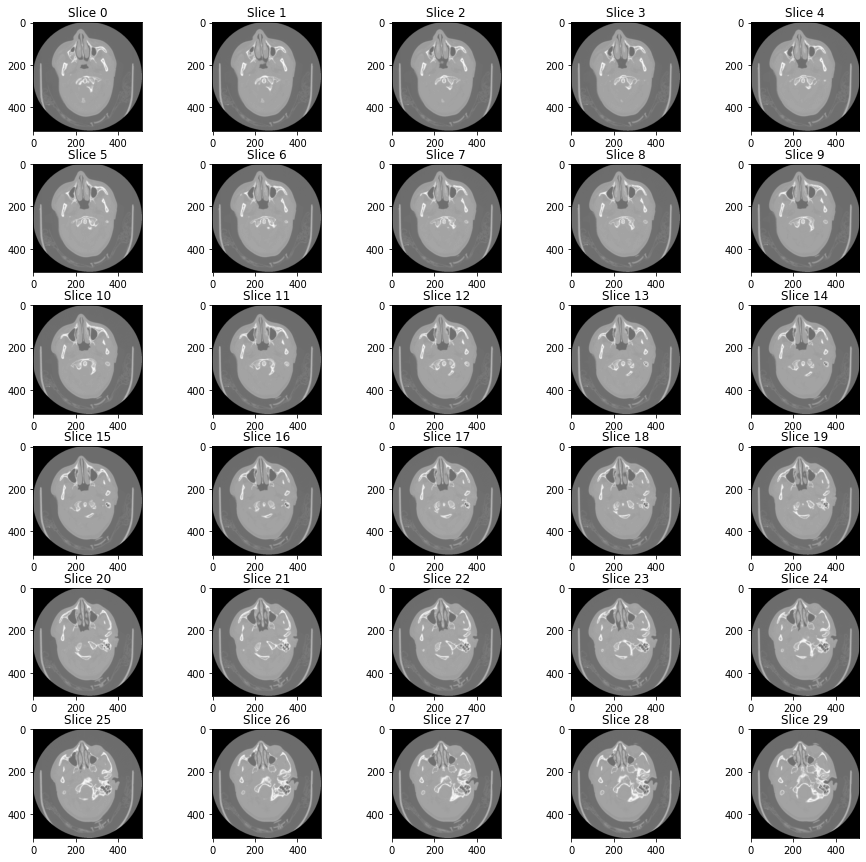

*************** 

# 3 Printing the images from patient CQ500CT106 CQ500CT106 
 path: /content/drive/MyDrive/VIZ/CQ500CT1 CQ500CT1/Unknown Study/CT 2.55mm


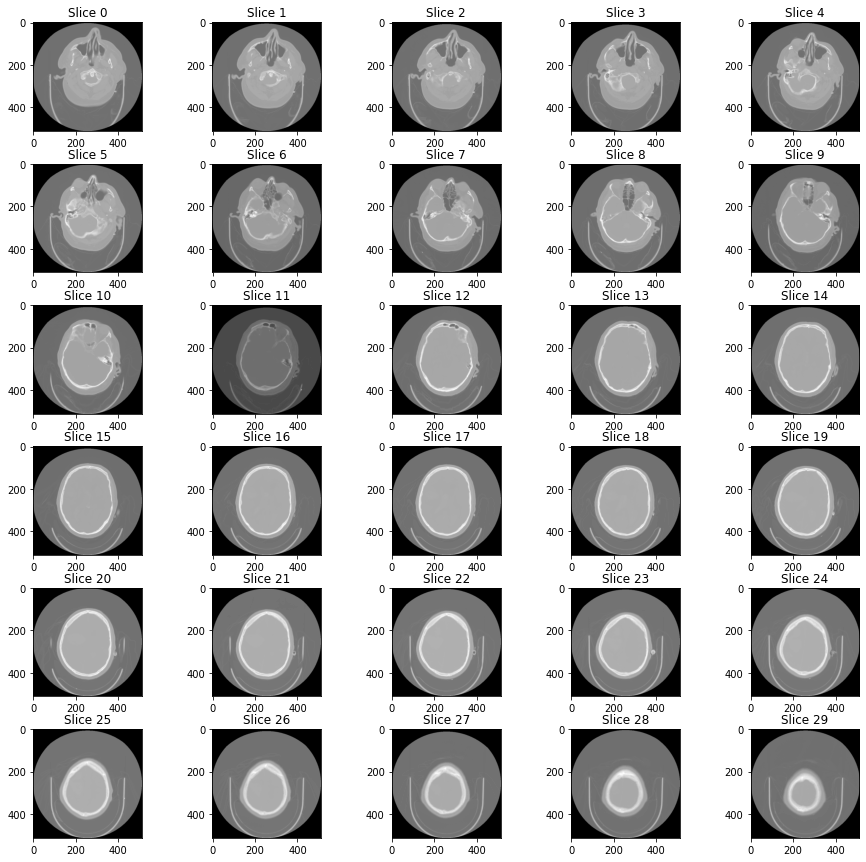

*************** 

# 4 Printing the images from patient CQ500CT106 CQ500CT106 
 path: /content/drive/MyDrive/VIZ/CQ500CT10 CQ500CT10/Unknown Study/CT PLAIN THIN


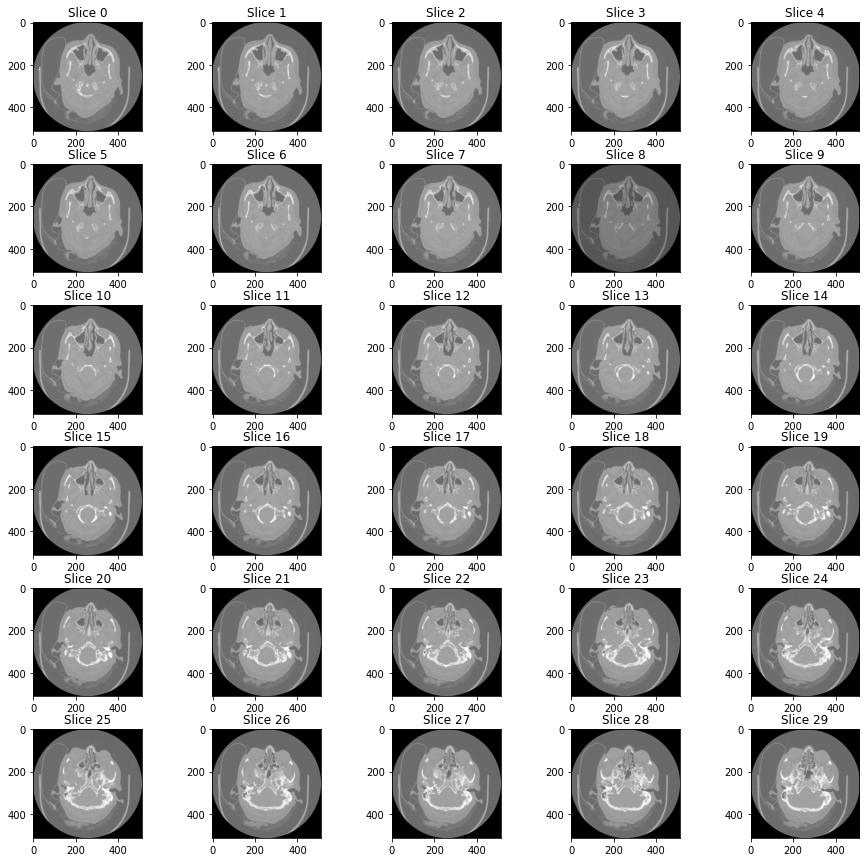

*************** 

# 5 Printing the images from patient CQ500CT106 CQ500CT106 
 path: /content/drive/MyDrive/VIZ/CQ500CT100 CQ500CT100/Unknown Study/CT Plain THIN


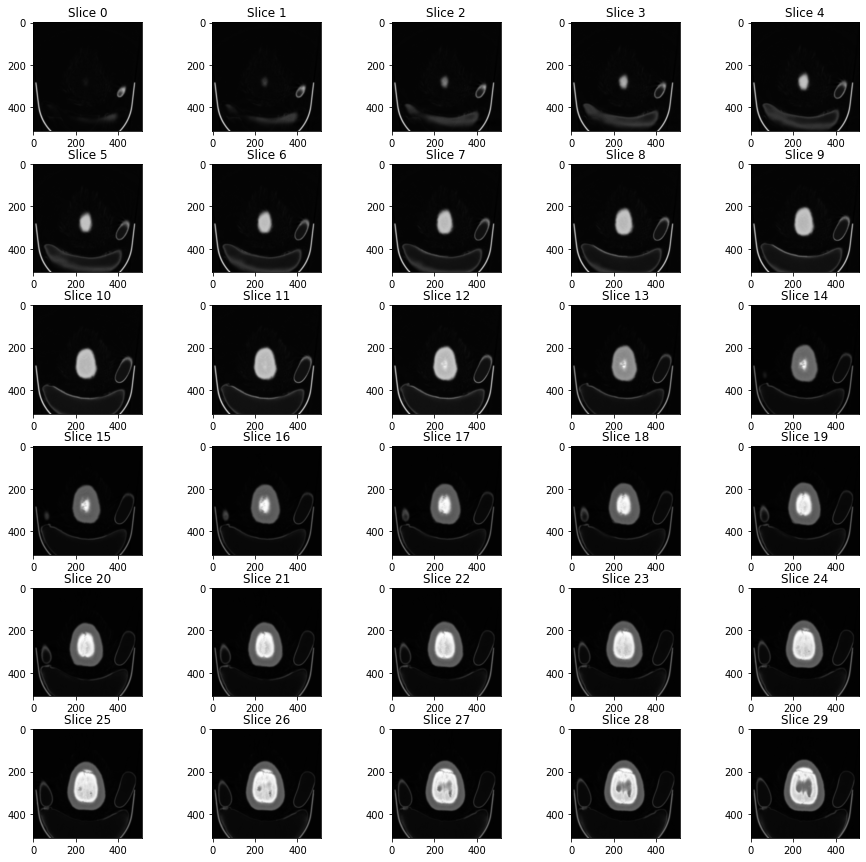

*************** 

# 6 Printing the images from patient CQ500CT106 CQ500CT106 
 path: /content/drive/MyDrive/VIZ/CQ500CT101 CQ500CT101/Unknown Study/CT PLAIN THIN


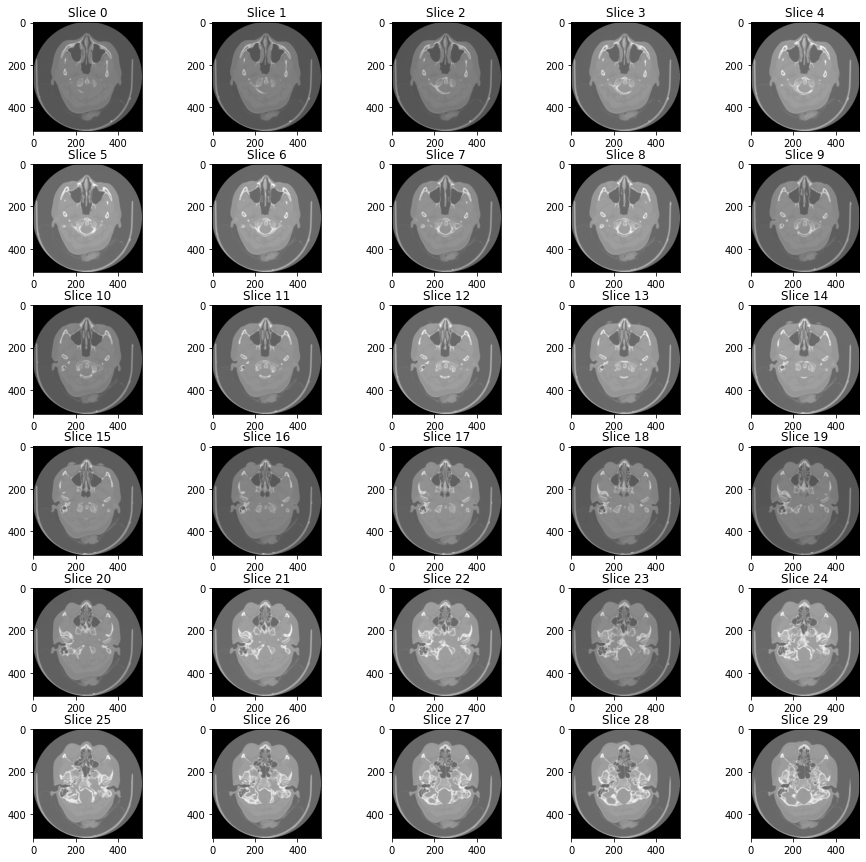

*************** 

# 7 Printing the images from patient CQ500CT106 CQ500CT106 
 path: /content/drive/MyDrive/VIZ/CQ500CT102 CQ500CT102/Unknown Study/CT PLAIN THIN


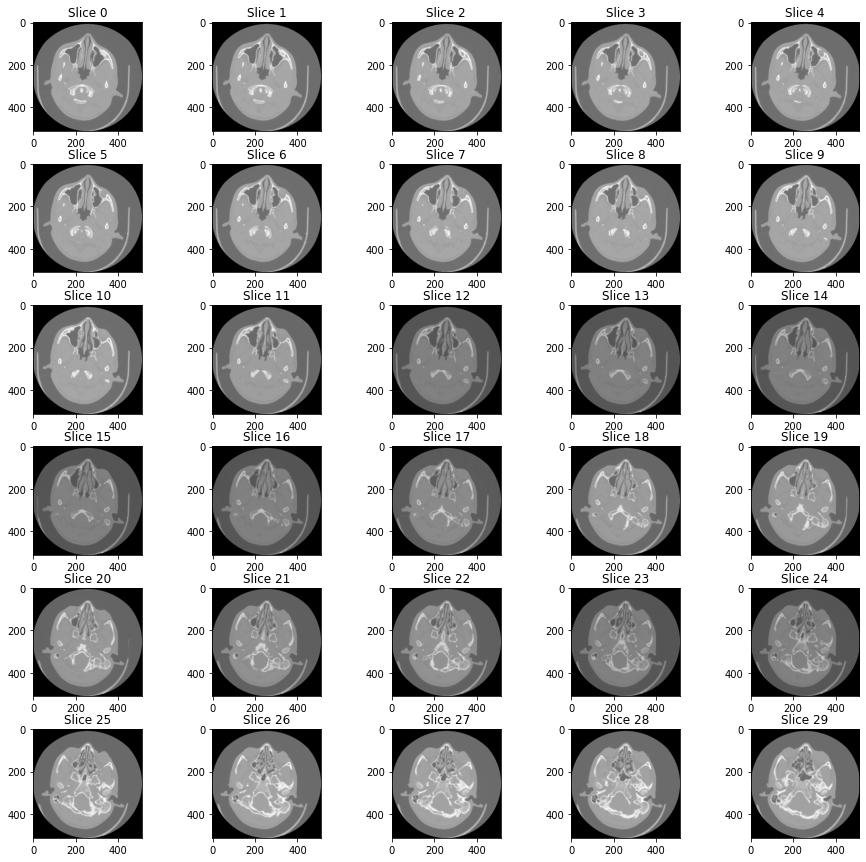

*************** 

# 8 Printing the images from patient CQ500CT106 CQ500CT106 
 path: /content/drive/MyDrive/VIZ/CQ500CT103 CQ500CT103/Unknown Study/CT Thin Plain


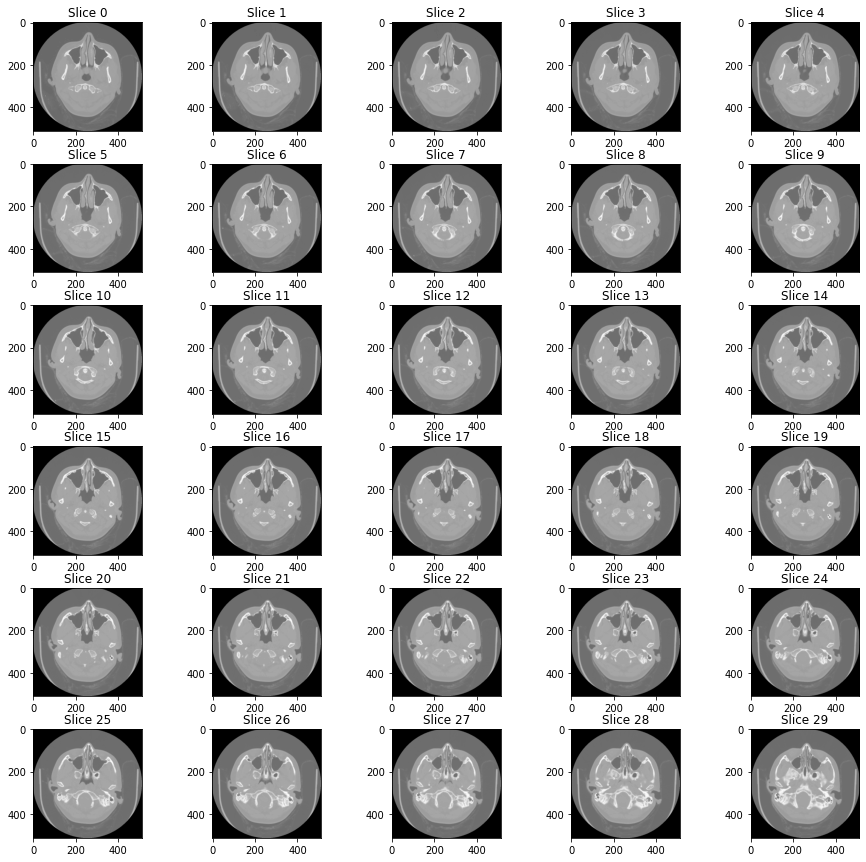

*************** 

# 9 Printing the images from patient CQ500CT106 CQ500CT106 
 path: /content/drive/MyDrive/VIZ/CQ500CT104 CQ500CT104/Unknown Study/CT PLAIN THIN


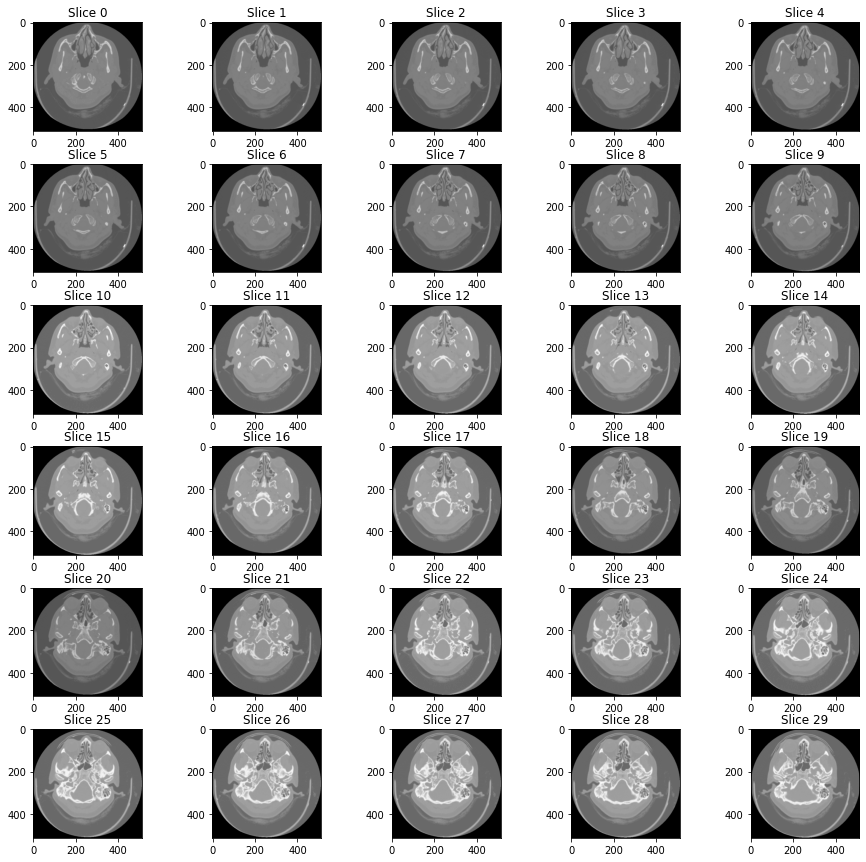

*************** 

# 10 Printing the images from patient CQ500CT106 CQ500CT106 
 path: /content/drive/MyDrive/VIZ/CQ500CT105 CQ500CT105/Unknown Study/CT PRE CONTRAST THIN


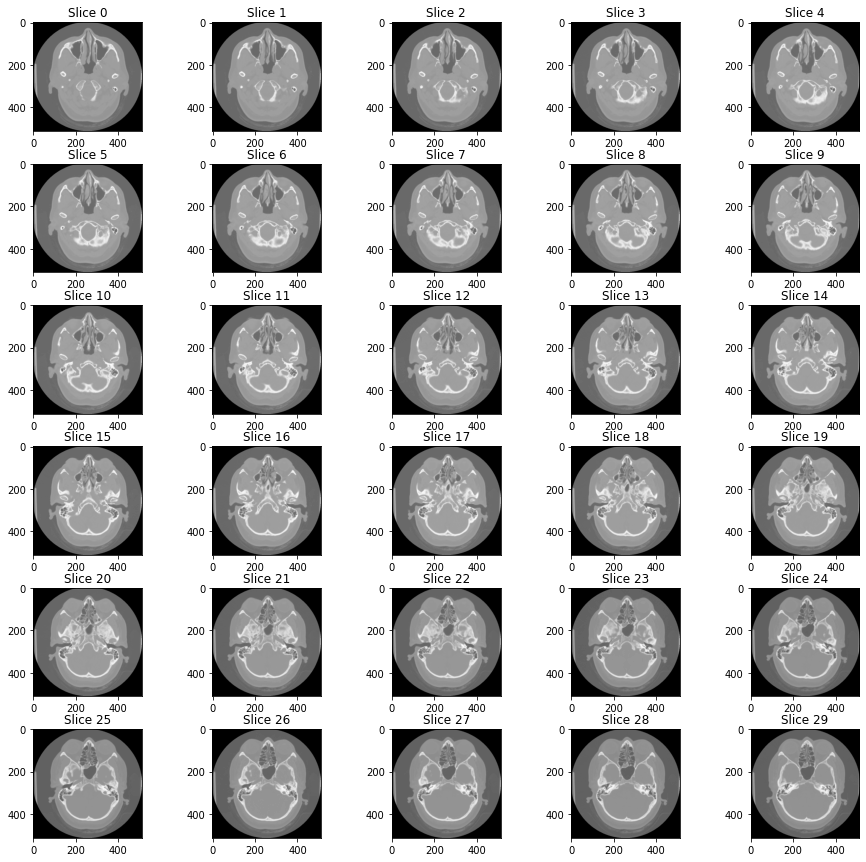

*************** 

# 11 Printing the images from patient CQ500CT106 CQ500CT106 
 path: /content/drive/MyDrive/VIZ/CQ500CT106 CQ500CT106/Unknown Study/CT Thin Plain


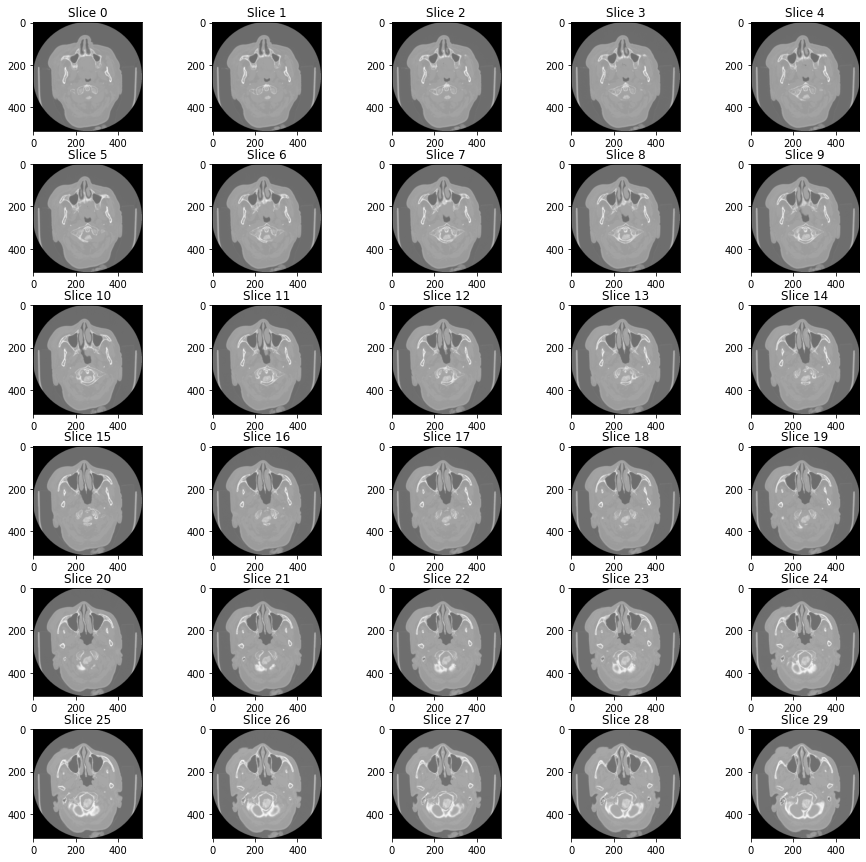

*************** 



In [ ]:
#patients_data - the first element is the name of the global folder (patient),
#and the second element - path to the head 
#folders = ['CT 4cc sec 150cc D3D on','CT 4cc sec 150cc D3D on-2','CT 4cc sec 150cc D3D on-3','CT PLAIN THIN', 'CT Plain']
patients_dcm=dict()
iter=0
for patient, path in patients_data:
  ct_data, unstacked_list = [], []
  path_to_head = Path(path)
  all_files = sorted(list(path_to_head.glob("*.dcm")))  # as glob returns a generator, we convert it to a list
  #print(all_files)
  for dicom_filepath in all_files:
    dicom = dcmread(dicom_filepath)
    ct_data.append(dicom)

  ct_data_ordered = sorted(ct_data, key=lambda slice: slice.SliceLocation) 

  ### Ordered slices ###
  #for slice in ct_data_ordered[:5]:
   #   print(slice.SliceLocation)


  for each_slice in ct_data_ordered:
      np_pixel_array = each_slice.pixel_array
      unstacked_list.append(np_pixel_array)
  final_array = np.array(unstacked_list)
  patients_dcm[iter] = final_array.copy()
  print('#',iter+1,'Printing the images from patient', folder, '\n path:',path)
  iter+=1
  fig, axis = plt.subplots(6, 5, figsize=(15, 15))

  slice_counter = 0
  for i in range(6):
      for j in range(5):
          axis[i][j].imshow(final_array[slice_counter], cmap="gray")
          axis[i][j].set_title('Slice '+str(slice_counter))
          slice_counter+=1
  plt.subplots_adjust(wspace=0.5, hspace=0.3)
  plt.show()
  print('*************** \n')
  

In [ ]:
print(patients_dcm.keys())

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])


In [ ]:
patients_dcm[0]

array([[[-2000, -2000, -2000, ..., -2000, -2000, -2000],
        [-2000, -2000, -2000, ..., -2000, -2000, -2000],
        [-2000, -2000, -2000, ..., -2000, -2000, -2000],
        ...,
        [-2000, -2000, -2000, ..., -2000, -2000, -2000],
        [-2000, -2000, -2000, ..., -2000, -2000, -2000],
        [-2000, -2000, -2000, ..., -2000, -2000, -2000]],

       [[-2000, -2000, -2000, ..., -2000, -2000, -2000],
        [-2000, -2000, -2000, ..., -2000, -2000, -2000],
        [-2000, -2000, -2000, ..., -2000, -2000, -2000],
        ...,
        [-2000, -2000, -2000, ..., -2000, -2000, -2000],
        [-2000, -2000, -2000, ..., -2000, -2000, -2000],
        [-2000, -2000, -2000, ..., -2000, -2000, -2000]],

       [[-2000, -2000, -2000, ..., -2000, -2000, -2000],
        [-2000, -2000, -2000, ..., -2000, -2000, -2000],
        [-2000, -2000, -2000, ..., -2000, -2000, -2000],
        ...,
        [-2000, -2000, -2000, ..., -2000, -2000, -2000],
        [-2000, -2000, -2000, ..., -2000, -20

So, the variable patients_dcm (dictionary) keeps all the arrays of all the patients

##MIP working variant

In [ ]:
len(plain_data_ordered)
medical_image = plain_data_ordered[0]
image = medical_image.pixel_array
print(image.min(), image.max())

-2000 2732


In [ ]:
def transform_to_hu(medical_image, image):
    intercept = medical_image.RescaleIntercept
    slope = medical_image.RescaleSlope
    hu_image = image * slope + intercept

    return hu_image

def window_image(image, window_center, window_width):
    img_min = window_center - window_width // 2
    img_max = window_center + window_width // 2
    window_image = image.copy()
    window_image[window_image < img_min] = img_min
    window_image[window_image > img_max] = img_max
    
    return window_image

hu_image = transform_to_hu(medical_image, image)
brain_image = window_image(hu_image, 40, 80)
bone_image = window_image(hu_image, 400, 1000)

def plot_4images(image, hu_image, brain_image, bone_image):
    plt.figure(figsize=(15, 2.5))
    plt.subplot(141)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(142)
    plt.imshow(hu_image, cmap='gray')
    plt.title('Hu Image')
    plt.axis('off')

    plt.subplot(143)
    plt.imshow(brain_image, cmap='gray')
    plt.title('Brain Image')
    plt.axis('off')

    plt.subplot(144)
    plt.imshow(bone_image, cmap='gray')
    plt.title('Bone Image')
    plt.axis('off')


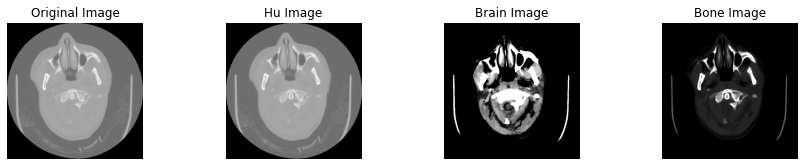

In [ ]:
plot_4images(image, hu_image, brain_image, bone_image)

In [ ]:
medical_image2 = plain_data_ordered[10]
image2 = medical_image2.pixel_array
print(image2.min(), image2.max())

-2000 2733


In [ ]:
hu_image2 = transform_to_hu(medical_image2, image2)
brain_image2 = window_image(hu_image2, 40, 80)
bone_image2 = window_image(hu_image2, 400, 1000)


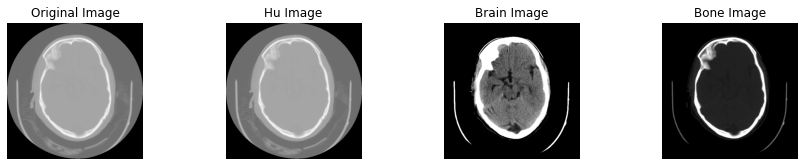

In [ ]:
plot_4images(image2, hu_image2, brain_image2, bone_image2)

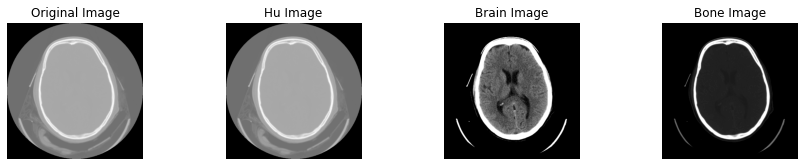

In [ ]:
medical_image3 = plain_data_ordered[15]
image3 = medical_image3.pixel_array
hu_image3 = transform_to_hu(medical_image3, image3)
brain_image3 = window_image(hu_image3, 40, 80)
bone_image3 = window_image(hu_image3, 400, 1000)
plot_4images(image3, hu_image3, brain_image3, bone_image3)

In [ ]:
#print(d_file[0x0028, 0x0010])
#print(d_file[0x0028, 0x0011])
#print('Rows: ', d_file.Rows)
#print('Columns: ', d_file.Columns)
#d_file.PhotometricInterpretation 
#ct = d_file.pixel_array

##Different planes and real volume pics

skipped, no SliceLocation: 0


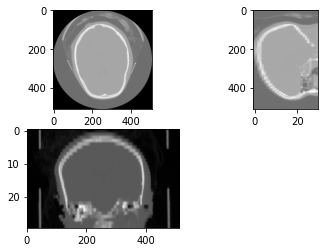

In [ ]:
import sys
import glob

# load the DICOM files
files = []
"""
print('glob: {}'.format(sys.argv[1]))
for fname in glob.glob(sys.argv[1], recursive=False):
    print("loading: {}".format(fname))
    files.append(dcmread(fname))

print("file count: {}".format(len(files)))
"""

home_path = '/content/drive/MyDrive/Study/'
folder = 'CT Plain'

path_to_head = Path(home_path + folder)
all_files = sorted(list(path_to_head.glob("*.dcm")))  # as glob returns a generator, we convert it to a list
  #print(all_files)
  #all_files=all_files[:-1]
for dicom_filepath in all_files:
    dicom = dcmread(dicom_filepath)
    files.append(dicom)


# skip files with no SliceLocation (eg scout views)
slices = []
skipcount = 0
for f in files:
    if hasattr(f, 'SliceLocation'):
        slices.append(f)
    else:
        skipcount = skipcount + 1

print("skipped, no SliceLocation: {}".format(skipcount))

# ensure they are in the correct order
slices = sorted(slices, key=lambda s: s.SliceLocation)

# pixel aspects, assuming all slices are the same
ps = slices[0].PixelSpacing
ss = slices[0].SliceThickness
ax_aspect = ps[1]/ps[0]
sag_aspect = ps[1]/ss
cor_aspect = ss/ps[0]

# create 3D array
img_shape = list(slices[0].pixel_array.shape)
img_shape.append(len(slices))
img3d = np.zeros(img_shape)

# fill 3D array with the images from the files
for i, s in enumerate(slices):
    img2d = s.pixel_array
    img3d[:, :, i] = img2d

img3d = np.flip(img3d, axis=None)


# plot 3 orthogonal slices
a1 = plt.subplot(2, 2, 1)
plt.imshow(img3d[:, :, img_shape[2]//2], cmap='gray')
# we are simply just taking the center of the plane img_shape[2]//2
a1.set_aspect(ax_aspect)

a2 = plt.subplot(2, 2, 2)
plt.imshow(img3d[:, img_shape[1]//2, :], cmap='gray')
a2.set_aspect(sag_aspect)

a3 = plt.subplot(2, 2, 3)
plt.imshow(img3d[img_shape[0]//2, :, :].T, cmap='gray')
a3.set_aspect(cor_aspect)

plt.show()

In [ ]:
img3d[img_shape[0]//2, :, :].T.shape

(30, 512)

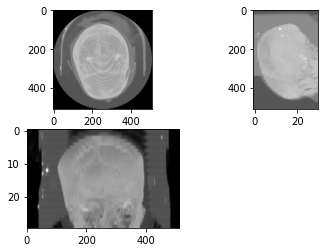

In [ ]:

#creating volume ax
img3d_vol = np.zeros(img3d.shape)
img3d_vol = img3d.max(axis=2)

a1 = plt.subplot(2, 2, 1)
plt.imshow(img3d_vol, cmap='gray')
a1.set_aspect(ax_aspect)

#creating volume sagital
img3d_vol = np.zeros(img3d.shape)
img3d_vol = img3d.max(axis=1)

a2 = plt.subplot(2, 2, 2)
plt.imshow(img3d_vol, cmap='gray')
a2.set_aspect(sag_aspect)


#creating volume coronal
img3d_vol = np.zeros(img3d.shape)
img3d_vol = img3d.max(axis=0)

a3 = plt.subplot(2, 2, 3)
plt.imshow(img3d_vol.T, cmap='gray')
a3.set_aspect(cor_aspect)

plt.show()
